#### Importing notebooks

In [1]:
%%capture
%run '01_Getting_Data.ipynb'

In [2]:
#get data
bitcoin_bubble = pandas.read_csv("../data/bitcoin_bubble_google_trends.csv", ',')

bitcoin_bubble = bitcoin_bubble.iloc[1:]
bitcoin_bubble.columns = ['search_volume_for_bitcoin_bubble']
bitcoin_bubble['search_volume_for_bitcoin_bubble'] = bitcoin_bubble['search_volume_for_bitcoin_bubble'].apply(pandas.to_numeric)

bitcoin_bubble.index.names = ['date']
bitcoin_bubble.index = bitcoin_bubble.index + "-15"
bitcoin_bubble.index = pandas.to_datetime(bitcoin_bubble.index, format="%Y-%m-%d")

In [6]:
dummy = pandas.concat([bitcoin_bubble, bpi], axis=1)

dummy.search_volume_for_bitcoin_bubble = dummy.search_volume_for_bitcoin_bubble.interpolate(method='linear', axis=0).ffill().bfill()

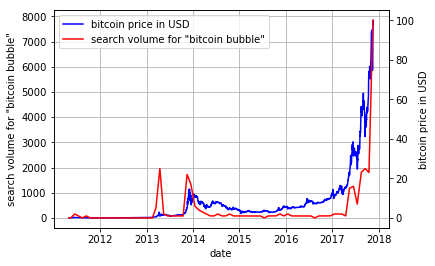

In [7]:
#plot data
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(dummy.index, dummy.bitcoin_price, label = bitcoin_title, color ='b')
ax2 = ax.twinx()
lns2 = ax2.plot(dummy.index, dummy.search_volume_for_bitcoin_bubble, label = 'search volume for "bitcoin bubble"', color = 'r')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel('search volume for "bitcoin bubble"')
ax2.set_ylabel(bitcoin_title)

In [8]:
dummy.head()

,search_volume_for_bitcoin_bubble,bitcoin_price
2011-05-01,0.0,3.0331
2011-05-02,0.0,3.2000
2011-05-03,0.0,3.4100
2011-05-04,0.0,3.4061
2011-05-05,0.0,3.3330
